In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
#from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm as svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#nltk.download('all')
nltk.data.path.append('text.csv')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\K.Akanksha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\K.Akanksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\K.Akanksha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\K.Akanksha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\K.Akanksha\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date

In [ ]:
df = pd.read_csv("text.csv")
df.isnull().sum()
df.duplicated().sum()
#df.drop_duplicates(subset=['text'], keep='first', inplace=True)
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)
print(f'The Shape Of Data Is : {df.shape}')
df.head()

The Shape Of Data Is : (416810, 2)


,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [ ]:
# Removing URLs, punctuations, whitespaces, numbers
df['Text'] = df['Text'].str.replace(r'http\S+', '', regex=True)
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)
df['Text'] = df['Text'].str.replace(r'\s+', ' ', regex=True)
df['Text'] = df['Text'].str.replace(r'\d+', '', regex=True)
df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
stop = stopwords.words('english')
df["Text"] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# Display the first few rows of the DataFrame to verify the changes
print(df.head())

                                                Text  Label
0                 feel really helpless heavy hearted      4
1  ive enjoyed able slouch relax unwind frankly n...      0
2            gave internship dmrg feeling distraught      4
3                                dont know feel lost      0
4  kindergarten teacher thoroughly weary job take...      4


In [ ]:
df['Text'] = [word_tokenize(sen) for sen in df['Text']]
tag = nltk.pos_tag_sents(df['Text'])
tag[0]

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\K.Akanksha/nltk_data'
    - 'c:\\Users\\K.Akanksha\\AppData\\Local\\Programs\\Python\\Python39\\nltk_data'
    - 'c:\\Users\\K.Akanksha\\AppData\\Local\\Programs\\Python\\Python39\\share\\nltk_data'
    - 'c:\\Users\\K.Akanksha\\AppData\\Local\\Programs\\Python\\Python39\\lib\\nltk_data'
    - 'C:\\Users\\K.Akanksha\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [ ]:
# Helper function for fetching wordnet pos labels
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
for i, tokens in enumerate(df['Text']):
    lemmatizer = WordNetLemmatizer()
    processed = []
    for (token, pos) in tag[i]:
     # filter out stop words and non-alphabetic tokens
            lemmatized = lemmatizer.lemmatize(token, get_wordnet_pos(pos)) # PoS is used HERE for lemmatization
            processed.append(lemmatized)
    df.loc[i, 'Text'] = " ".join(processed)

In [ ]:
# Lets Rename Label also {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
df['Label'] = df['Label'].replace(0,'Sadness')
df['Label'] = df['Label'].replace(1,'Joy')
df['Label'] = df['Label'].replace(2,'Love')
df['Label'] = df['Label'].replace(3,'Anger')
df['Label'] = df['Label'].replace(4,'Fear')
df['Label'] = df['Label'].replace(5,'Surprise')

In [ ]:
# Make Seperate Data Set to Visualize text 
# Sadness
df_sadness = df[df['Label']=='Sadness']
# Joy
df_joy = df[df['Label']=='Joy']
# Love
df_love = df[df['Label']=='Love']
# Anger
df_anger = df[df['Label']=='Anger']
# Fear
df_fear = df[df['Label']=='Fear']
# Surprise
df_surprise = df[df['Label']=='Surprise']

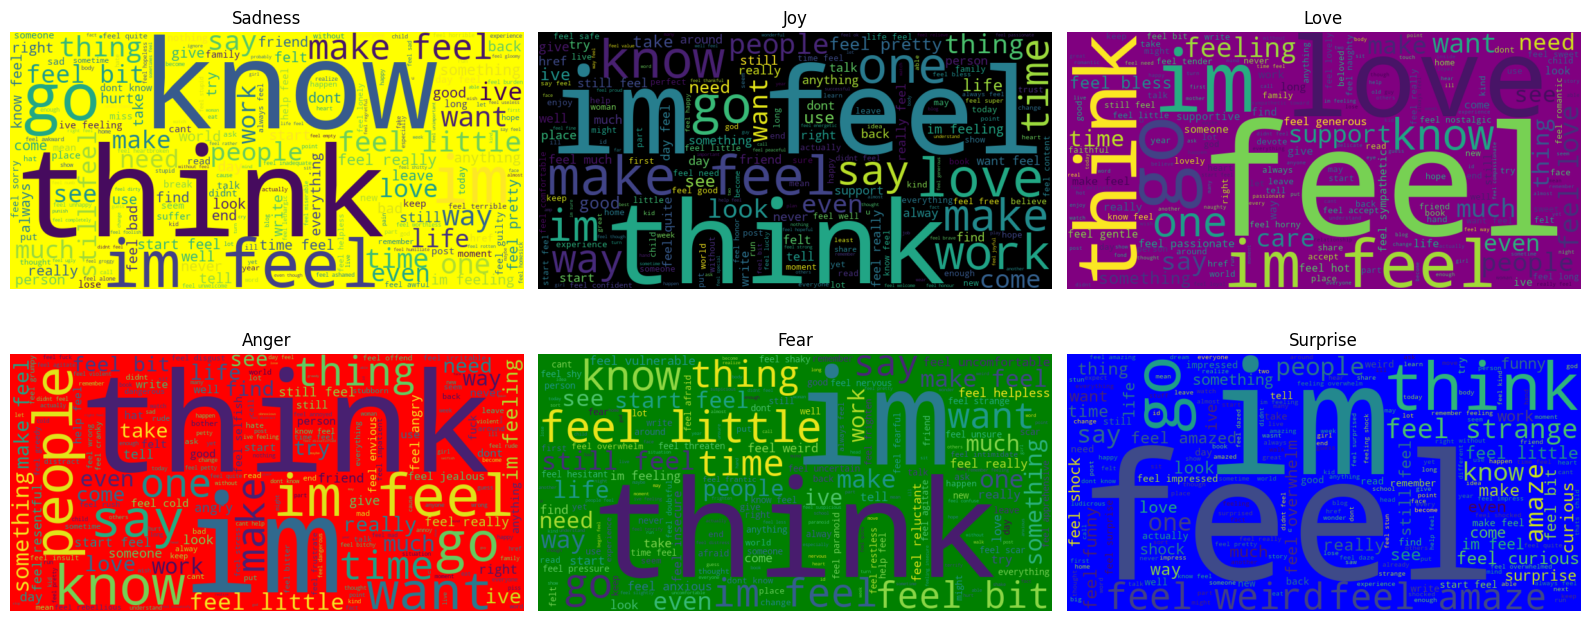

In [ ]:
# Combine text from different categories
combined_sadness_text = ' '.join(df_sadness['Text'])
combined_joy_text = ' '.join(df_joy['Text'])
combined_love_text = ' '.join(df_love['Text'])
combined_anger_text = ' '.join(df_anger['Text'])
combined_fear_text = ' '.join(df_fear['Text'])
combined_surprise_text = ' '.join(df_surprise['Text'])

# Create word clouds
sadness_wordcloud = WordCloud(width=800, height=400, background_color='yellow').generate(combined_sadness_text)
joy_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(combined_joy_text)
love_wordcloud = WordCloud(width=800, height=400, background_color='purple').generate(combined_love_text)
anger_wordcloud = WordCloud(width=800, height=400, background_color='red').generate(combined_anger_text)
fear_wordcloud = WordCloud(width=800, height=400, background_color='green').generate(combined_fear_text)
surprise_wordcloud = WordCloud(width=800, height=400, background_color='blue').generate(combined_surprise_text)

# Plot the word clouds
plt.figure(figsize=(16, 7))

plt.subplot(2, 3, 1)
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.title('Sadness')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(love_wordcloud, interpolation='bilinear')
plt.title('Love')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(surprise_wordcloud, interpolation='bilinear')
plt.title('Surprise')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Count the occurrences of each unique label
label_counts = df['Label'].value_counts()

# Display the label counts
print("Label Counts:")
print(label_counts)

Label Counts:
Label
Joy         141067
Sadness     121187
Anger        57317
Fear         47712
Love         34554
Surprise     14972
Name: count, dtype: int64


C:\Users\Navya\AppData\Local\Temp\ipykernel_21824\3403313848.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='viridis')


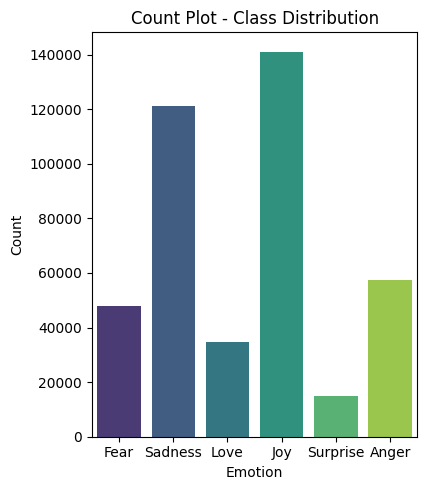

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the labels and corresponding counts
labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
counts = df['Label'].value_counts()

# Plot a pie chart
plt.figure(figsize=(12, 5))

# Count plot
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Label', palette='viridis')
plt.title('Count Plot - Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Define the resampling strategy (undersampling or oversampling)
# Uncomment one of the following lines based on your choice

# Undersampling
sampler = RandomUnderSampler(sampling_strategy='auto')

# Oversampling
#sampler = RandomOverSampler(sampling_strategy='auto')

# Apply the resampling strategy to create a balanced dataset
X_resampled, y_resampled = sampler.fit_resample(df[['Text']], df['Label'])

# Create a new DataFrame with the balanced dataset
balanced_df = pd.DataFrame({'Text': X_resampled['Text'], 'Label': y_resampled})

# Print the class distribution in the balanced dataset
print(balanced_df['Label'].value_counts())

Label
Anger       14972
Fear        14972
Joy         14972
Love        14972
Sadness     14972
Surprise    14972
Name: count, dtype: int64


C:\Users\Navya\AppData\Local\Temp\ipykernel_21824\4221032237.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=balanced_df, x='Label', palette='viridis')


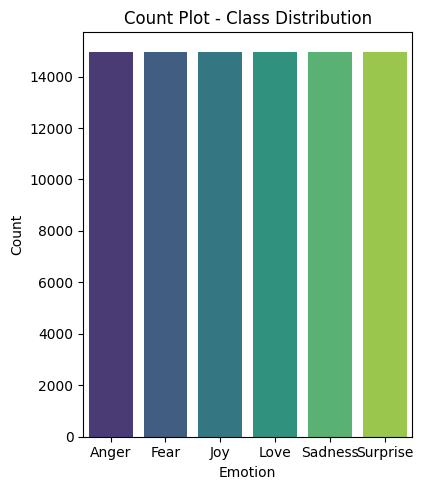

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the labels and corresponding counts
labels = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
counts = balanced_df['Label'].value_counts()

# Plot a pie chart
plt.figure(figsize=(12, 5))

# Count plot
plt.subplot(1, 3, 3)
sns.countplot(data=balanced_df, x='Label', palette='viridis')
plt.title('Count Plot - Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
df['Label'] = df['Label'].replace('Sadness',0)
df['Label'] = df['Label'].replace('Joy',1)
df['Label'] = df['Label'].replace('Love',2)
df['Label'] = df['Label'].replace('Anger',3)
df['Label'] = df['Label'].replace('Fear',4)
df['Label'] = df['Label'].replace('Surprise',5)

C:\Users\Navya\AppData\Local\Temp\ipykernel_21824\1924796156.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace('Surprise',5)


In [ ]:
X = balanced_df['Text']
y = balanced_df['Label']

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (71865,)
X_test shape: (17967,)


In [ ]:

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
#tfidf_vectorizer.fit(balanced_df['Text'])
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print(X_test_tfidf)

  (0, 1030)	0.39593684488858516
  (0, 1641)	0.08637181024774097
  (0, 1784)	0.38115401984549874
  (0, 1868)	0.681013358857602
  (0, 3131)	0.47614739678728174
  (1, 747)	0.4857784956971103
  (1, 809)	0.41497701435347667
  (1, 1641)	0.15445036858629815
  (1, 2097)	0.3651329322554808
  (1, 2198)	0.20885571386229362
  (1, 4713)	0.48977996148226666
  (1, 4806)	0.388756011169087
  (2, 143)	0.4733121032288125
  (2, 154)	0.2716550647339768
  (2, 1641)	0.06396092955209869
  (2, 2003)	0.3278888818437464
  (2, 2566)	0.24860125610524925
  (2, 3355)	0.44834465047137867
  (2, 3520)	0.21680338342167063
  (2, 4057)	0.30383872202389267
  (2, 4327)	0.3359017162187722
  (2, 4865)	0.2749725626844663
  (3, 1641)	0.11411681259577434
  (3, 2105)	0.6817542843000395
  (3, 2198)	0.3086292195549273
  :	:
  (17965, 2138)	0.20821393546674907
  (17965, 2196)	0.1923193851501985
  (17965, 2198)	0.10416726721518313
  (17965, 2537)	0.16462541501764935
  (17965, 2604)	0.1350382941259259
  (17965, 2796)	0.312615804912045

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

y_pred_lr = lr_model.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy (Logistic Regression):", accuracy_lr)
# Classification report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

Accuracy (Logistic Regression): 0.8944175432737798

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       Anger       0.90      0.91      0.90      2980
        Fear       0.89      0.84      0.87      2961
         Joy       0.89      0.87      0.88      3115
        Love       0.89      0.92      0.90      2981
     Sadness       0.92      0.88      0.90      3094
    Surprise       0.88      0.96      0.92      2836

    accuracy                           0.89     17967
   macro avg       0.89      0.90      0.89     17967
weighted avg       0.89      0.89      0.89     17967



In [ ]:
# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the TF-IDF transformed training set
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_nb= naive_bayes_classifier.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_nb)
print("Accuracy (Navie Bayes):", accuracy_lr)
# Classification report
print("\nClassification Report (Navie Bayes):")
print(classification_report(y_test, y_pred_nb))

Accuracy (Navie Bayes): 0.8608003562086046

Classification Report (Navie Bayes):
              precision    recall  f1-score   support

       Anger       0.88      0.89      0.88      2980
        Fear       0.86      0.82      0.84      2961
         Joy       0.85      0.82      0.84      3115
        Love       0.84      0.88      0.86      2981
     Sadness       0.89      0.85      0.87      3094
    Surprise       0.84      0.91      0.87      2836

    accuracy                           0.86     17967
   macro avg       0.86      0.86      0.86     17967
weighted avg       0.86      0.86      0.86     17967



In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)
#y_train_pred = rf_classifier.predict(X_train_tfidf)
y_pred_f = model.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_f)
print("Accuracy ():", accuracy_lr)
# Classification report
print("\nClassification Report ():")
print(classification_report(y_test, y_pred_nb))

Accuracy (): 0.8690933377859409

Classification Report ():
              precision    recall  f1-score   support

       Anger       0.88      0.89      0.88      2980
        Fear       0.86      0.82      0.84      2961
         Joy       0.85      0.82      0.84      3115
        Love       0.84      0.88      0.86      2981
     Sadness       0.89      0.85      0.87      3094
    Surprise       0.84      0.91      0.87      2836

    accuracy                           0.86     17967
   macro avg       0.86      0.86      0.86     17967
weighted avg       0.86      0.86      0.86     17967



In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_f = svm_model.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_f)
print("Accuracy (SVM):", accuracy_lr)
# Classification report
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_nb))

Accuracy (SVM): 0.89530806478544

Classification Report (SVM):
              precision    recall  f1-score   support

       Anger       0.88      0.89      0.88      2980
        Fear       0.86      0.82      0.84      2961
         Joy       0.85      0.82      0.84      3115
        Love       0.84      0.88      0.86      2981
     Sadness       0.89      0.85      0.87      3094
    Surprise       0.84      0.91      0.87      2836

    accuracy                           0.86     17967
   macro avg       0.86      0.86      0.86     17967
weighted avg       0.86      0.86      0.86     17967



In [ ]:
import joblib
joblib.dump(svm_model,'model.joblib')
joblib.dump(tfidf_vectorizer,'vectorizer.joblib')

['vectorizer.joblib']